In [11]:
import mnist_data_loader
mnist_dataset = mnist_data_loader.read_data_sets("./MNIST_data/", one_hot=False)
# training dataset
train_set = mnist_dataset.train
# test dataset
test_set = mnist_dataset.test
print("Training dataset size: ", train_set.num_examples)
print("Test dataset size: ", test_set.num_examples)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Training dataset size:  12049
Test dataset size:  1968


3


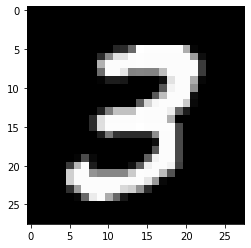

In [12]:
import matplotlib.pyplot as plt
import numpy as np
example_id = 0
image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 1
print(label)
plt.imshow(np.reshape(image,[28,28]),cmap="gray")
plt.show()

In [13]:
batch_size = 1000
max_epoch = 200
for epoch in range(0, max_epoch):
    iter_per_batch = train_set.num_examples // batch_size
    for batch_id in range(0, iter_per_batch):
        # get the data of next minibatch (have been shuffled)
        batch = train_set.next_batch(batch_size)
        input, label = batch

In [14]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))

    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    grads = {"dw": dw, "db": db}
    
    return grads, cost


def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred